182804011 Musa Tayyip GÖRGEÇ

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_path="/content/drive/MyDrive/BilgiTabanliProje/data/train"
test_path="/content/drive/MyDrive/BilgiTabanliProje/data/test"

Verilere Erişim

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(48,48),
                                            batch_size=20,
                                            class_mode="binary")


test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(48,48),
                                          batch_size=20,
                                          class_mode="binary")

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


Model oluşturma(CNN) (Original,Epochs,Augmentation)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
from keras.models import Sequential

def Model():
  model=Sequential()

  model.add(Conv2D(32,(3,3),activation="relu",input_shape=(48,48,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation="relu"))
  model.add(Flatten())
  model.add(Dense(256,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.summary()

  model.compile(loss="binary_crossentropy",
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=["acc"])
  return model

Original Model Eğitim

In [ ]:
original_model=Model()
original_history=original_model.fit_generator(
    train_set,
    steps_per_epoch=100,
    epochs=8,
    validation_data=test_set,
    validation_steps=30
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/8
100/100 [==============================] - 405s 4s/step - loss: 0.6301 - acc: 0.6279 - val_loss: 0.5221 - val_acc: 0.7767
Epoch 2/8
100/100 [==============================] - 62s 623ms/step - loss: 0.5290 - acc: 0.7286 - val_loss: 0.5521 - val_acc: 0.7317
Epoch 3/8
100/100 [==============================] - 19s 193ms/step - loss: 0.4573 - acc: 0.7767 - val_loss: 0.4276 - val_acc: 0.7900
Epoch 4/8
100/100 [==============================] - 11s 109ms/step - loss: 0.4377 - acc: 0.7835 - val_loss: 0.3889 - val_acc: 0.8100
Epoch 5/8
100/100 [==============================] - 9s 95ms/step - loss: 0.4181 - acc: 0.8047 - val_loss: 0.3820 - val_acc: 0.8033
Epoch 6/8
100/100 [==============================] - 9s 86ms/step - loss: 0.4087 - acc: 0.7990 - val_loss: 0.3589 - val_acc: 0.8283
Epoch 7/8
100/100 [==============================] - 9s 86ms/step - loss: 0.3853 - acc: 0.8145 - val_loss: 0.3639 - val_acc: 0.8067
Epoch 8/8
100/100 [==============================] - 8s 84ms/step - lo

Epochs Model Eğitimi

In [ ]:
epochs_model=Model()
epochs_history=epochs_model.fit_generator(
    train_set,
    steps_per_epoch=100,
    epochs=20,
    validation_data=test_set,
    validation_steps=30
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 8192)             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - 9s 87ms/step - loss: 0.6313 - acc: 0.6335 - val_loss: 0.5018 - val_acc: 0.7583
Epoch 2/20
100/100 [==============================] - 9s 86ms/step - loss: 0.5073 - acc: 0.7471 - val_loss: 0.4341 - val_acc: 0.7733
Epoch 3/20
100/100 [==============================] - 9s 86ms/step - loss: 0.4455 - acc: 0.7865 - val_loss: 0.4370 - val_acc: 0.7633
Epoch 4/20
100/100 [==============================] - 9s 85ms/step - loss: 0.4397 - acc: 0.7827 - val_loss: 0.3854 - val_acc: 0.7900
Epoch 5/20
100/100 [==============================] - 9s 85ms/step - loss: 0.4242 - acc: 0.7962 - val_loss: 0.3909 - val_acc: 0.7867
Epoch 6/20
100/100 [==============================] - 9s 85ms/step - loss: 0.4039 - acc: 0.8042 - val_loss: 0.3801 - val_acc: 0.8067
Epoch 7/20
100/100 [==============================] - 8s 84ms/step - loss: 0.4019 - acc: 0.8097 - val_loss: 0.4049 - val_acc: 0.8050
Epoch 8/20
100/100 [==============================] - 8s 85ms/step - loss: 0.396

Dropout Model oluşturma

In [ ]:
from keras.layers import Dropout

dropout_model=Sequential()

dropout_model.add(Conv2D(32,(3,3),activation="relu",input_shape=(48,48,3)))
dropout_model.add(MaxPooling2D((2,2)))
dropout_model.add(Conv2D(64,(3,3),activation="relu"))
dropout_model.add(MaxPooling2D((2,2)))
dropout_model.add(Dropout(0.25))
dropout_model.add(Conv2D(128,(3,3),activation="relu"))
dropout_model.add(Flatten())
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(256,activation="relu"))
dropout_model.add(Dense(1,activation="sigmoid"))

dropout_model.summary()

dropout_model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)        

Dropout Model Eğitimi

In [ ]:
dropout_history=dropout_model.fit_generator(
    train_set,
    steps_per_epoch=100,
    epochs=8,
    validation_data=test_set,
    validation_steps=30
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 9s 83ms/step - loss: 0.6191 - acc: 0.6410 - val_loss: 0.5678 - val_acc: 0.7633
Epoch 2/8
100/100 [==============================] - 8s 82ms/step - loss: 0.5034 - acc: 0.7381 - val_loss: 0.4696 - val_acc: 0.7450
Epoch 3/8
100/100 [==============================] - 8s 81ms/step - loss: 0.4646 - acc: 0.7795 - val_loss: 0.4187 - val_acc: 0.7817
Epoch 4/8
100/100 [==============================] - 8s 81ms/step - loss: 0.4476 - acc: 0.7822 - val_loss: 0.5229 - val_acc: 0.7333
Epoch 5/8
100/100 [==============================] - 8s 81ms/step - loss: 0.4314 - acc: 0.7965 - val_loss: 0.3926 - val_acc: 0.8083
Epoch 6/8
100/100 [==============================] - 8s 81ms/step - loss: 0.4177 - acc: 0.7952 - val_loss: 0.3899 - val_acc: 0.8183
Epoch 7/8
100/100 [==============================] - 8s 81ms/step - loss: 0.4156 - acc: 0.7945 - val_loss: 0.3761 - val_acc: 0.8250
Epoch 8/8
100/100 [==============================] - 8s 80ms/step - loss: 0.3985 - acc

Augmentation yapılmış verilere ulaşma

In [ ]:
train_path_aug="/content/drive/MyDrive/BilgiTabanliProje/data/veri_artirma"
train_aug_datagen=ImageDataGenerator(rescale=1./255)

train_aug_set=train_aug_datagen.flow_from_directory(train_path_aug,
                                                    target_size=(48,48),
                                                    batch_size=20,
                                                    class_mode="binary")

Found 8160 images belonging to 2 classes.


Augmentation Model Eğitimi

In [ ]:
aug_model=Model()
augmentation_history=aug_model.fit_generator(
    train_aug_set,
    steps_per_epoch=100,
    epochs=8,
    validation_data=test_set,
    validation_steps=30
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 8192)             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/8
100/100 [==============================] - 304s 3s/step - loss: 0.5619 - acc: 0.7165 - val_loss: 0.4906 - val_acc: 0.7917
Epoch 2/8
100/100 [==============================] - 223s 2s/step - loss: 0.4651 - acc: 0.7775 - val_loss: 0.5122 - val_acc: 0.7533
Epoch 3/8
100/100 [==============================] - 169s 2s/step - loss: 0.4297 - acc: 0.7950 - val_loss: 0.4510 - val_acc: 0.7583
Epoch 4/8
100/100 [==============================] - 122s 1s/step - loss: 0.4416 - acc: 0.7855 - val_loss: 0.4949 - val_acc: 0.7633
Epoch 5/8
100/100 [==============================] - 89s 884ms/step - loss: 0.4138 - acc: 0.8045 - val_loss: 0.4100 - val_acc: 0.8200
Epoch 6/8
100/100 [==============================] - 71s 707ms/step - loss: 0.4152 - acc: 0.7955 - val_loss: 0.4170 - val_acc: 0.8117
Epoch 7/8
100/100 [==============================] - 63s 636ms/step - loss: 0.4141 - acc: 0.7885 - val_loss: 0.4794 - val_acc: 0.7800
Epoch 8/8
100/100 [==============================] - 44s 443ms/step - 

Katman ve Düğüm Model oluşturma(Flatten önce Conv2d(128), MaxPooling eklendi.

In [ ]:
four_model=Sequential()

four_model.add(Conv2D(32,(3,3),activation="relu",input_shape=(48,48,3)))
four_model.add(MaxPooling2D((2,2)))
four_model.add(Conv2D(64,(3,3),activation="relu"))
four_model.add(MaxPooling2D((2,2)))
four_model.add(Conv2D(128,(3,3),activation="relu"))
four_model.add(Conv2D(128,(3,3),activation="relu"))
four_model.add(MaxPooling2D((2,2)))
four_model.add(Flatten())
four_model.add(Dense(256,activation="relu"))
four_model.add(Dense(1,activation="sigmoid"))

four_model.summary()

four_model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 6, 6, 128)        

Katman ve düğüm modeli eğitimi

In [ ]:
four_history=four_model.fit_generator(
    train_aug_set,
    steps_per_epoch=100,
    epochs=8,
    validation_data=test_set,
    validation_steps=30
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/8
100/100 [==============================] - 37s 369ms/step - loss: 0.5950 - acc: 0.6790 - val_loss: 0.6647 - val_acc: 0.6150
Epoch 2/8
100/100 [==============================] - 32s 314ms/step - loss: 0.4999 - acc: 0.7585 - val_loss: 0.6033 - val_acc: 0.6633
Epoch 3/8
100/100 [==============================] - 19s 188ms/step - loss: 0.4784 - acc: 0.7550 - val_loss: 0.4617 - val_acc: 0.7633
Epoch 4/8
100/100 [==============================] - 20s 195ms/step - loss: 0.4555 - acc: 0.7750 - val_loss: 0.4148 - val_acc: 0.7933
Epoch 5/8
100/100 [==============================] - 14s 144ms/step - loss: 0.4265 - acc: 0.8055 - val_loss: 0.4555 - val_acc: 0.7983
Epoch 6/8
100/100 [==============================] - 12s 120ms/step - loss: 0.4512 - acc: 0.7805 - val_loss: 0.4563 - val_acc: 0.7700
Epoch 7/8
100/100 [==============================] - 13s 129ms/step - loss: 0.4249 - acc: 0.7895 - val_loss: 0.3924 - val_acc: 0.8000
Epoch 8/8
100/100 [==============================] - 10s 98ms/

Tüm eğitimlerin grafik sonuçları

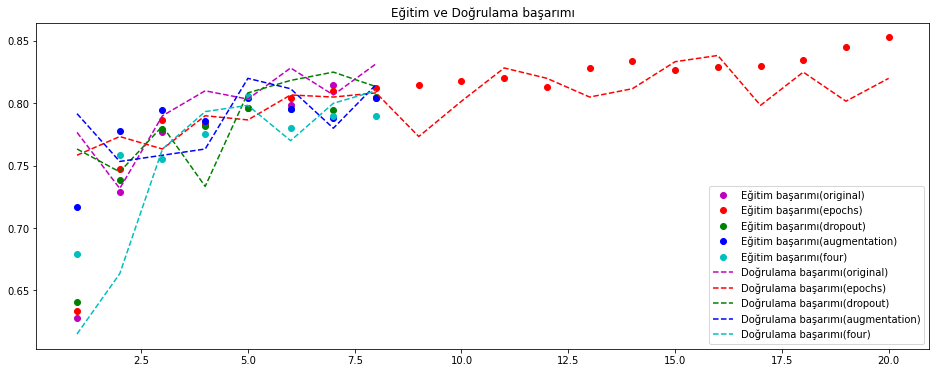

<Figure size 432x288 with 0 Axes>

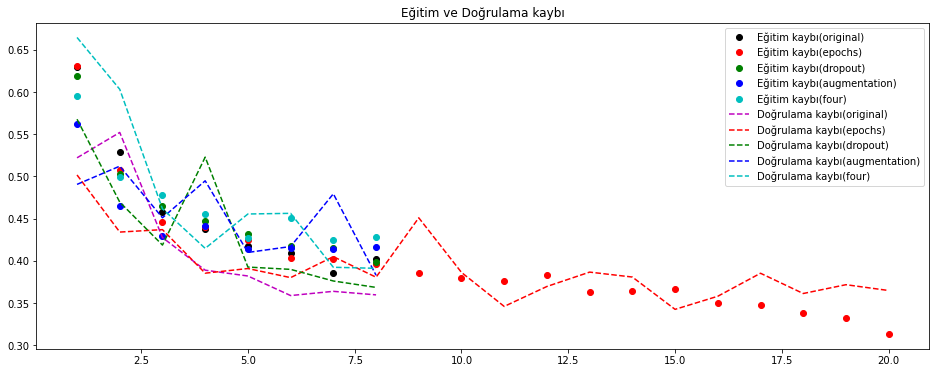

In [ ]:
import matplotlib.pyplot as plt

#original
acc_original=original_history.history["acc"]
val_acc_original=original_history.history["val_acc"]
loss_original=original_history.history["loss"]
val_loss_original=original_history.history["val_loss"]

epochsO=range(1,len(acc_original)+1)
val_epochsO=range(1,len(val_acc_original)+1)

#epochs
acc_epochs=epochs_history.history["acc"]
val_acc_epochs=epochs_history.history["val_acc"]
loss_epochs=epochs_history.history["loss"]
val_loss_epochs=epochs_history.history["val_loss"]

epochsE=range(1,len(acc_epochs)+1)
val_epochsE=range(1,len(val_acc_epochs)+1)

#dropout
acc_dropout=dropout_history.history["acc"]
val_acc_dropout=dropout_history.history["val_acc"]
loss_dropout=dropout_history.history["loss"]
val_loss_dropout=dropout_history.history["val_loss"]

epochsD=range(1,len(acc_dropout)+1)
val_epochsD=range(1,len(val_acc_dropout)+1)

#augmentation
acc_augmentation=augmentation_history.history["acc"]
val_acc_augmentation=augmentation_history.history["val_acc"]
loss_augmentation=augmentation_history.history["loss"]
val_loss_augmentation=augmentation_history.history["val_loss"]

epochsA=range(1,len(acc_augmentation)+1)
val_epochsA=range(1,len(val_acc_augmentation)+1)

#four
acc_four=four_history.history["acc"]
val_acc_four=four_history.history["val_acc"]
loss_four=four_history.history["loss"]
val_loss_four=four_history.history["val_loss"]

epochsF=range(1,len(acc_four)+1)
val_epochsF=range(1,len(val_acc_four)+1)

sizeplt=plt.figure()
sizeplt.set_figwidth(16)
sizeplt.set_figheight(6)

plt.plot(epochsO,acc_original,'mo',label="Eğitim başarımı(original)")
plt.plot(epochsE,acc_epochs,'ro',label="Eğitim başarımı(epochs)")
plt.plot(epochsD,acc_dropout,'go',label="Eğitim başarımı(dropout)")
plt.plot(epochsA,acc_augmentation,'bo',label="Eğitim başarımı(augmentation)")
plt.plot(epochsF,acc_four,'co',label="Eğitim başarımı(four)")
plt.plot(val_epochsO,val_acc_original,'m--',label="Doğrulama başarımı(original)")
plt.plot(val_epochsE,val_acc_epochs,'r--',label="Doğrulama başarımı(epochs)")
plt.plot(val_epochsD,val_acc_dropout,'g--',label="Doğrulama başarımı(dropout)")
plt.plot(val_epochsA,val_acc_augmentation,'b--',label="Doğrulama başarımı(augmentation)")
plt.plot(val_epochsF,val_acc_four,'c--',label="Doğrulama başarımı(four)")
plt.title("Eğitim ve Doğrulama başarımı")
plt.legend()
plt.figure()


sizeplt=plt.figure()
sizeplt.set_figwidth(16)
sizeplt.set_figheight(6)

plt.plot(epochsO,loss_original,'ko',label="Eğitim kaybı(original)")
plt.plot(epochsE,loss_epochs,'ro',label="Eğitim kaybı(epochs)")
plt.plot(epochsD,loss_dropout,'go',label="Eğitim kaybı(dropout)")
plt.plot(epochsA,loss_augmentation,'bo',label="Eğitim kaybı(augmentation)")
plt.plot(epochsF,loss_four,'co',label="Eğitim kaybı(four)")
plt.plot(val_epochsO,val_loss_original,'m--',label="Doğrulama kaybı(original)")
plt.plot(val_epochsE,val_loss_epochs,'r--',label="Doğrulama kaybı(epochs)")
plt.plot(val_epochsD,val_loss_dropout,'g--',label="Doğrulama kaybı(dropout)")
plt.plot(val_epochsA,val_loss_augmentation,'b--',label="Doğrulama kaybı(augmentation)")
plt.plot(val_epochsF,val_loss_four,'c--',label="Doğrulama kaybı(four)")
plt.title("Eğitim ve Doğrulama kaybı")
plt.legend()

plt.show()

Tüm model kayıp ve doğrululuk oranı bulma(Test)

In [ ]:
#original
test_lossO,test_accO=original_model.evaluate_generator(test_set,len(test_set.filenames))
#epochs
test_lossE,test_accE=epochs_model.evaluate_generator(test_set,len(test_set.filenames))
#dropout
test_lossD,test_accD=dropout_model.evaluate_generator(test_set,len(test_set.filenames))
#augmentation
test_lossA,test_accA=aug_model.evaluate_generator(test_set,len(test_set.filenames))
#four
test_lossF,test_accF=four_model.evaluate_generator(test_set,len(test_set.filenames))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Model kayıp ve doğrululuk çıktıları

In [ ]:
print("Başlık\t\t Doğruluk Oranı\t\t Kayıp Oranı")
print("Original\t",test_accO,"\t",test_lossO)
print("Epochs\t\t",test_accE,"\t",test_lossE)
print("Dropout\t\t",test_accD,"\t",test_lossD)
print("Augmentation\t",test_accA,"\t",test_lossA)
print("Four\t\t",test_accF,"\t",test_lossF)

Başlık		 Doğruluk Oranı		 Kayıp Oranı
Original	 0.8333333134651184 	 0.3623100817203522
Epochs		 0.8166666626930237 	 0.36579564213752747
Dropout		 0.8166666626930237 	 0.36653727293014526
Augmentation	 0.8136363625526428 	 0.3840787410736084
Four		 0.8045454621315002 	 0.3945170044898987


Augmentation (veri çoğaltma)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img

#augmentation gerekli ayarlar
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_path="/content/drive/MyDrive/BilgiTabanliProje/data/train"

#orjinal verilerine ulaşma
train_set=datagen.flow_from_directory(train_path,
                                            target_size=(48,48),
                                            batch_size=20,
                                            class_mode="binary")
#veri isimlerine ulaşma
file=train_set.filenames

#veri çoğaltma
for i in file:
  img=load_img("/content/drive/MyDrive/BilgiTabanliProje/data/train/"+i)
  x=img_to_array(img)
  x=x.reshape((1,)+x.shape)
  k=0
  for batch in datagen.flow(x,batch_size=1,
                            save_to_dir="/content/drive/MyDrive/BilgiTabanliProje/data/veri_artirma/"+i.split("/")[0],
                            save_format='jpeg'):
    k+=1
    if k>3:
      break